# Insurance Claims Fraud Detection Project

# Problem Statement:

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made.

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
# preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# data collaction

In [2]:
df = pd.read_csv('Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
df.head()
# check the top 5 rows of the data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.shape
# checking the shape

(1000, 40)

In [5]:
df.describe()
# by describe method to get a summary of the basic statistical measures for a DataFrame or Series. 
#It provides descriptive statistics.

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


by describe method we can see no nulls are present in data, and also can check mean,s.d.,25%,50%,75%and max values of continous data

In [6]:
df.dtypes
# checking the data types

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [7]:
# checking columns
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [8]:
df.nunique()
# check how much unique values data has

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [9]:
#Checking for missing values
df.isna().sum()


months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [10]:
# dropping unimportant columns

df = df.drop(columns = [
    'policy_number', 
    'policy_csl',
    'insured_zip',
    'policy_bind_date', 
    'incident_date', 
    'incident_location', 
    '_c39', 
    'auto_year', 
    'incident_hour_of_the_day',
       ])

In [11]:
df.head(5)
#checking columns deleted or not


,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,328,48,OH,1000,1406.91,0,MALE,MD,craft-repair,sleeping,...,1,2,YES,71610,6510,13020,52080,Saab,92x,Y
1,228,42,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,...,0,0,?,5070,780,780,3510,Mercedes,E400,Y
2,134,29,OH,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,...,2,3,NO,34650,7700,3850,23100,Dodge,RAM,N
3,256,41,IL,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,...,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,Y
4,228,44,IL,1000,1583.91,6000000,MALE,Associate,sales,board-games,...,0,1,NO,6500,1300,650,4550,Accura,RSX,N


# EDA(Exploratory Data Analysis )-analyzing and visualizing data to understand its distribution, patterns, and relationships.

UNIVIRATE ANALYSIS

In [12]:
#cheking  the value count OF FRAUD REPORTED
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

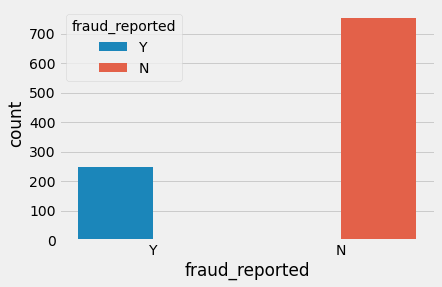

In [13]:
#plot value counts of fraud_reported
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='fraud_reported', data=df, hue='fraud_reported')

we know that fraud_reported is our dependent variable Exploratory data analysis was conducted starting with the dependent variable, Fraud_reported. There were 247 frauds and 753 non-frauds. 24.7% of the data were frauds while 75.3% were non-fraudulent claims.

In [14]:
# converting target into 0 and 1
df['fraud_reported'].replace(to_replace='Y', value=1, inplace=True)
df['fraud_reported'].replace(to_replace='N',  value=0, inplace=True)

df.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,328,48,OH,1000,1406.91,0,MALE,MD,craft-repair,sleeping,...,1,2,YES,71610,6510,13020,52080,Saab,92x,1
1,228,42,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,...,0,0,?,5070,780,780,3510,Mercedes,E400,1
2,134,29,OH,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,...,2,3,NO,34650,7700,3850,23100,Dodge,RAM,0
3,256,41,IL,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,...,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,1
4,228,44,IL,1000,1583.91,6000000,MALE,Associate,sales,board-games,...,0,1,NO,6500,1300,650,4550,Accura,RSX,0


In [15]:
#cheking  the value count of policy_state
df['policy_state'].value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

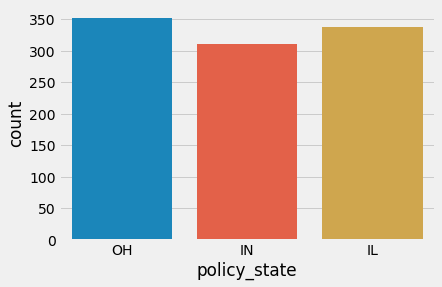

In [16]:
#plot value counts of policy_state
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='policy_state', data=df)

In [17]:
#cheking  the value count 
df['insured_hobbies'].value_counts()

reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

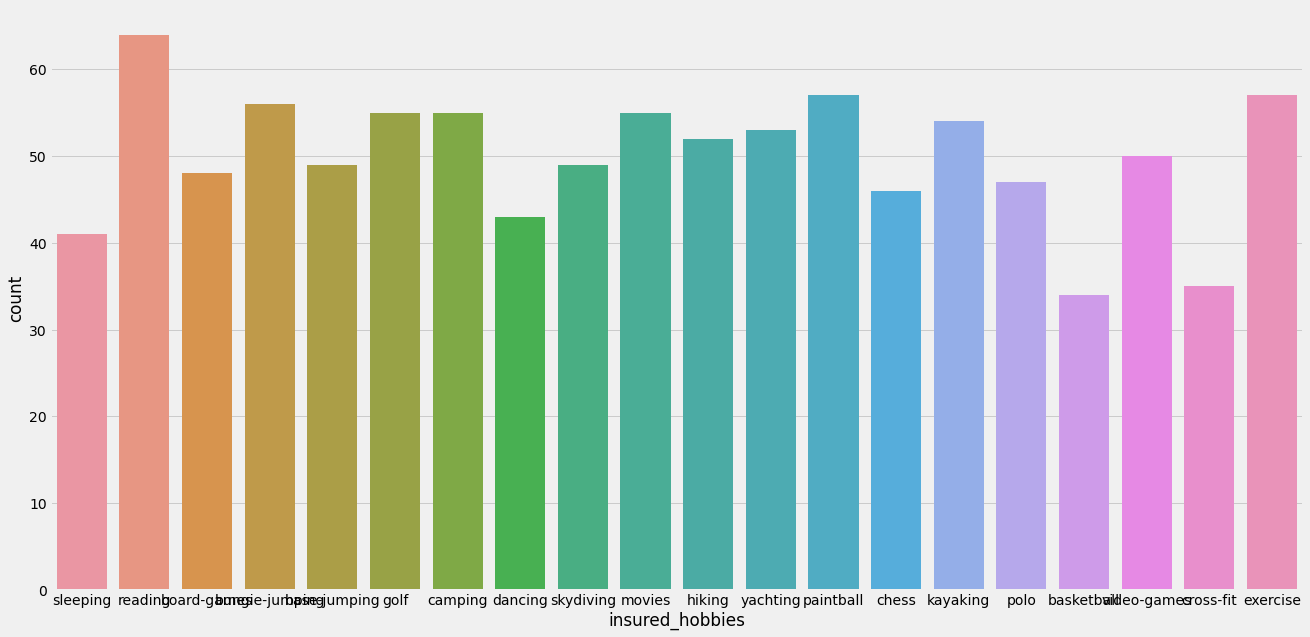

In [18]:
#plot value counts
plt.figure(figsize=(20,10))
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='insured_hobbies', data=df)

as we can see on above plot reading hobbies have  most no of insurence.

In [19]:
#cheking  the value count
df['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

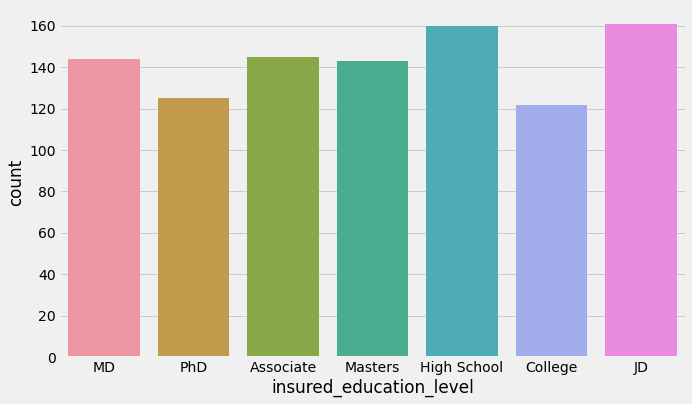

In [20]:
#plot value counts
plt.figure(figsize=(10, 6))
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='insured_education_level', data=df)

as we can see on above plot jd education level guys have  most insurences.

In [21]:
#cheking  the value count
df['incident_city'].value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

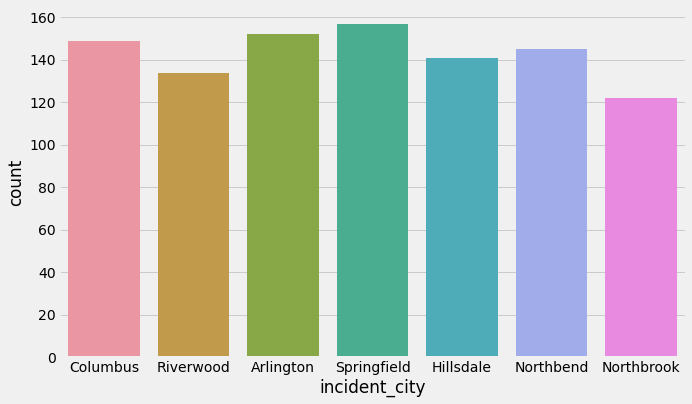

In [22]:
#plot value counts
plt.figure(figsize=(10, 6))
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='incident_city', data=df)

as we can see springfield city has most incident cases.

In [23]:
#cheking  the value count
df['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

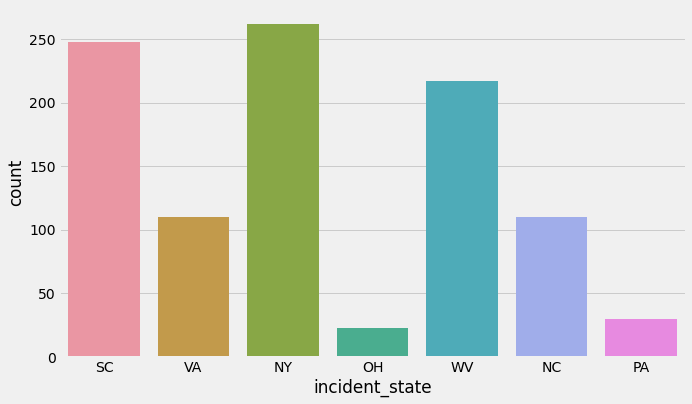

In [24]:
#plot value counts
plt.figure(figsize=(10, 6))
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='incident_state', data=df)

as we can see new york state has most incident cases.

BIVIRATE ANALYSIS

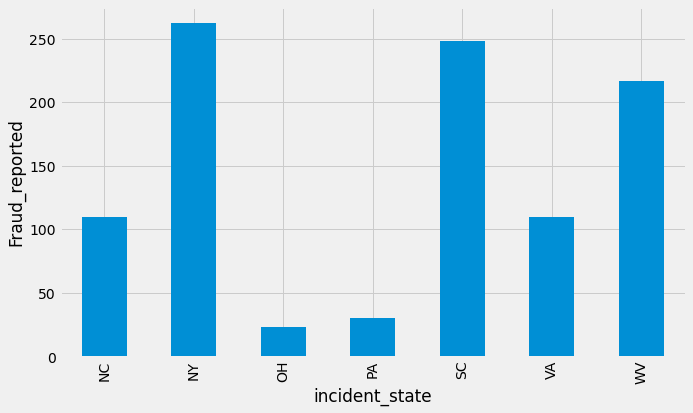

In [25]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_state').fraud_reported.count().plot.bar()
ax.set_ylabel('Fraud_reported')
plt.show()

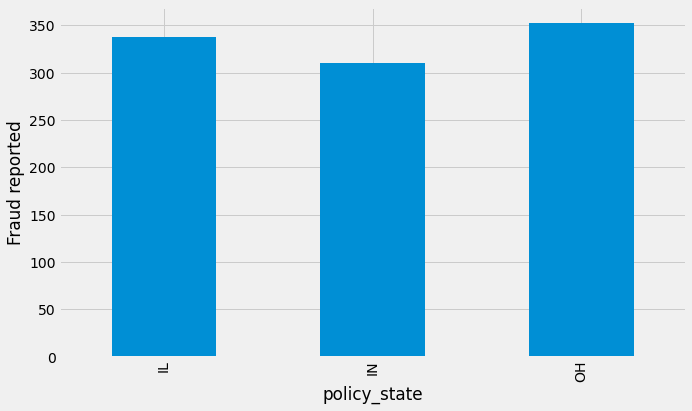

In [26]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('policy_state').fraud_reported.count().plot.bar()
ax.set_ylabel('Fraud reported')
plt.show()

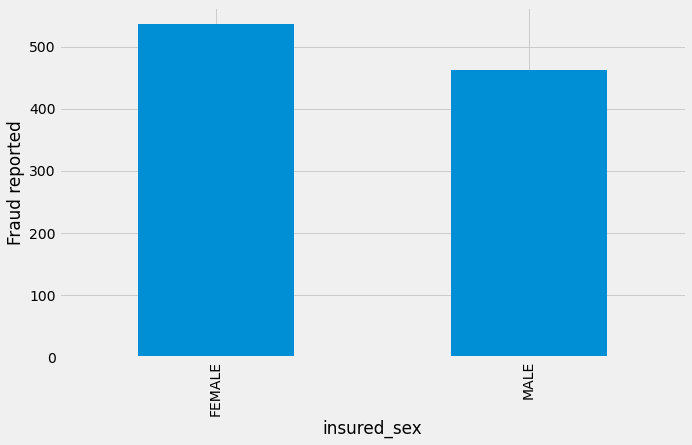

In [27]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('insured_sex').fraud_reported.count().plot.bar()
ax.set_ylabel('Fraud reported')
plt.show()

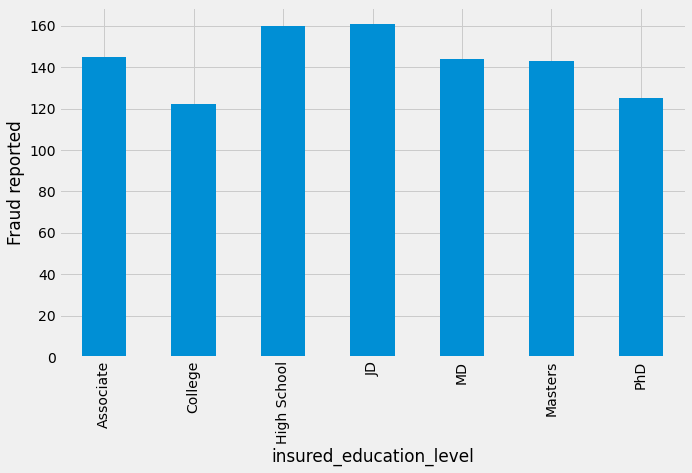

In [28]:

plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('insured_education_level').fraud_reported.count().plot.bar()
ax.set_ylabel('Fraud reported')
plt.show()

In [29]:
# check correlation
corr=df.corr()
corr.shape

(15, 15)

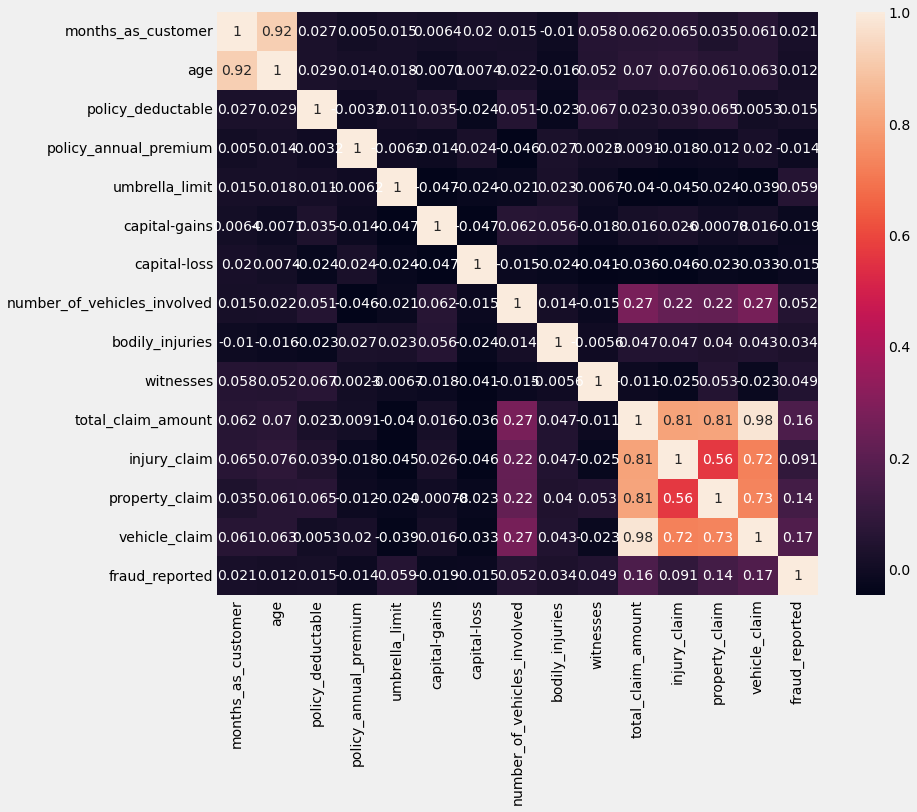

In [30]:
# plotting the heat map to find the correlation bw feature
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True)
plt.show()

AS WE CAN SEE IN HEAT MAP 'INJURY CLAIM ',' PRORERTY CLAIM',AND'VECHIL CLAIM' ARE HIGHLY CORR WITH TOTAL CLAIM AMOUNT SO I AM GOING TO DROP THESE COLUMNS

In [31]:
# dropping unimportant columns

df = df.drop(columns = [
'injury_claim',                      
'property_claim',                    
'vehicle_claim'   ])

In [32]:
df
# to check columns drop or not

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_model,fraud_reported
0,328,48,OH,1000,1406.91,0,MALE,MD,craft-repair,sleeping,...,Columbus,1,YES,1,2,YES,71610,Saab,92x,1
1,228,42,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,...,Riverwood,1,?,0,0,?,5070,Mercedes,E400,1
2,134,29,OH,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,...,Columbus,3,NO,2,3,NO,34650,Dodge,RAM,0
3,256,41,IL,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,...,Arlington,1,?,1,2,NO,63400,Chevrolet,Tahoe,1
4,228,44,IL,1000,1583.91,6000000,MALE,Associate,sales,board-games,...,Arlington,1,NO,0,1,NO,6500,Accura,RSX,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,1000,1310.80,0,FEMALE,Masters,craft-repair,paintball,...,Northbrook,1,YES,0,1,?,87200,Honda,Accord,0
996,285,41,IL,1000,1436.79,0,FEMALE,PhD,prof-specialty,sleeping,...,Northbend,1,YES,2,3,?,108480,Volkswagen,Passat,0
997,130,34,OH,500,1383.49,3000000,FEMALE,Masters,armed-forces,bungie-jumping,...,Arlington,3,?,2,3,YES,67500,Suburu,Impreza,0
998,458,62,IL,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,base-jumping,...,Arlington,1,?,0,1,YES,46980,Audi,A5,0


In [33]:
# get numerics columns
df._get_numeric_data().columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'number_of_vehicles_involved', 'bodily_injuries',
       'witnesses', 'total_claim_amount', 'fraud_reported'],
      dtype='object')

In [34]:
df.select_dtypes(include=['object']).columns 

Index(['policy_state', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make',
       'auto_model'],
      dtype='object')

 now we will perform encoding on catagorical columns.

In [35]:
# encoding
dummies = pd.get_dummies(df[[
    'policy_state', 
    'insured_sex', 
    'insured_education_level',
    'insured_occupation', 
    'insured_hobbies', 
    'insured_relationship',
    'incident_type', 
    'incident_severity',
    'authorities_contacted', 
    'incident_state', 
    'incident_city',
    'auto_make', 
    'auto_model', 
    'collision_type', 
    'property_damage',
    'police_report_available']])

In [36]:
dummies.head()

,policy_state_IL,policy_state_IN,policy_state_OH,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,...,collision_type_?,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,property_damage_?,property_damage_NO,property_damage_YES,police_report_available_?,police_report_available_NO,police_report_available_YES
0,0,0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
1,0,1,0,0,1,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
2,0,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,1,0,0,0,1,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


now join old data with new data or we can say that join catagorical columns with numerics columns

In [37]:
df =df.join(dummies)
# by joinig old data set will not delete but new data set will add

In [38]:
# now check whole data set
df.shape

(1000, 170)

In [39]:
df.head ()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,collision_type_?,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,property_damage_?,property_damage_NO,property_damage_YES,police_report_available_?,police_report_available_NO,police_report_available_YES
0,328,48,OH,1000,1406.91,0,MALE,MD,craft-repair,sleeping,...,0,0,0,1,0,0,1,0,0,1
1,228,42,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,...,1,0,0,0,1,0,0,1,0,0
2,134,29,OH,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,...,0,0,1,0,0,1,0,0,1,0
3,256,41,IL,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,...,0,1,0,0,1,0,0,0,1,0
4,228,44,IL,1000,1583.91,6000000,MALE,Associate,sales,board-games,...,1,0,0,0,0,1,0,0,1,0


now we have  new data then   delete  catagorical data columns or old data which repeted in this new data frame.

In [40]:

df.drop(['policy_state', 
    'insured_sex', 
    'insured_education_level',
    'insured_occupation', 
    'insured_hobbies', 
    'insured_relationship',
    'incident_type', 
    'incident_severity',
    'authorities_contacted', 
    'incident_state', 
    'incident_city',
    'auto_make', 
    'auto_model', 
    'collision_type', 
    'property_damage',
    'police_report_available'],axis=1,inplace=True)

In [41]:
df.head ()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,...,collision_type_?,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,property_damage_?,property_damage_NO,property_damage_YES,police_report_available_?,police_report_available_NO,police_report_available_YES
0,328,48,1000,1406.91,0,53300,0,1,1,2,...,0,0,0,1,0,0,1,0,0,1
1,228,42,2000,1197.22,5000000,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
2,134,29,2000,1413.14,5000000,35100,0,3,2,3,...,0,0,1,0,0,1,0,0,1,0
3,256,41,2000,1415.74,6000000,48900,-62400,1,1,2,...,0,1,0,0,1,0,0,0,1,0
4,228,44,1000,1583.91,6000000,66000,-46000,1,0,1,...,1,0,0,0,0,1,0,0,1,0


splitting data into training set and test set

In [42]:
y= df['fraud_reported']
x =df.drop(['fraud_reported'], axis=1)
# standard scaler
scaler=StandardScaler()
x_scaler =scaler.fit_transform (x)
#Data split into train test
x_train, x_test, y_train, y_test = train_test_split (x_scaler, y, test_size=0.3, random_state=42)


In [43]:
#Model confidence/accuracy

#write one function and call as many as times to check accuracy_score of different models 
def metric_score(clf, x_train, x_test,y_train, y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        print("\n================Train Result======")
        print (f"Accuracy Score: {accuracy_score(y_train, y_pred) * 100:.2f}%")
     
    elif train==False:
        pred = clf.predict(x_test)
        print("\n================TEST Result======")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%") 
        print('\n \n Test Classification Report \n', classification_report(y_test,pred,digits=2))

# model building

In [44]:
# by xg boost
import xgboost as xgb
xgb=xgb.XGBClassifier()
xgb.fit(x_train,y_train)

C:\Users\Subham\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\Subham\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:38:00] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [45]:
# call the fn. and pass dataset to chek train and test score
metric_score(xgb,x_train,x_test,y_train,y_test,train=True)# for training
metric_score(xgb,x_train,x_test,y_train,y_test,train=False)#for test


================Train Result======
Accuracy Score: 100.00%

================TEST Result======
Accuracy Score: 78.00%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       220
           1       0.60      0.51      0.55        80

    accuracy                           0.78       300
   macro avg       0.72      0.69      0.70       300
weighted avg       0.77      0.78      0.77       300



xg boost seems overfitted so i will try another one

In [46]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [47]:
# call the fn. and pass dataset to chek train and test score
metric_score(rfc,x_train,x_test,y_train,y_test,train=True)# for training
metric_score(rfc,x_train,x_test,y_train,y_test,train=False)#for test


================Train Result======
Accuracy Score: 100.00%

================TEST Result======
Accuracy Score: 74.33%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.77      0.92      0.84       220
           1       0.54      0.25      0.34        80

    accuracy                           0.74       300
   macro avg       0.66      0.59      0.59       300
weighted avg       0.71      0.74      0.71       300



again it is also seems overfitted so i will move to the next one.

In [48]:
#SVM
from sklearn.svm import SVC
svc= SVC()
svc.fit(x_train,y_train)

SVC()

In [49]:
# call the fn. and pass dataset to chek train and test score
metric_score(svc,x_train,x_test,y_train,y_test,train=True)# for training
metric_score(svc,x_train,x_test,y_train,y_test,train=False)#for test


================Train Result======
Accuracy Score: 97.14%

================TEST Result======
Accuracy Score: 73.33%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.75      0.95      0.84       220
           1       0.50      0.12      0.20        80

    accuracy                           0.73       300
   macro avg       0.62      0.54      0.52       300
weighted avg       0.68      0.73      0.67       300



in svm i seems it is not overfitted model and i can improve performance of this model by usin hyperparameter tuning.

HYPERPERAMETER TUNNING OF SVC BYGRID SEARCH CV

In [50]:
from sklearn. model_selection import GridSearchCV

In [51]:
param_grid = {'C':[1,5,10, 20],
                  'gamma': [0.001,.01,0.2,0.002]
             }

In [52]:
gridsearch =GridSearchCV(svc, param_grid)
gridsearch.fit (x_train, y_train)
# best parms
gridsearch.best_params_


{'C': 10, 'gamma': 0.002}

In [53]:
svc =SVC (C= 10, gamma =.002)
svc.fit(x_train,y_train)
#Call the function and pass dataset to check train and test score
metric_score (svc, x_train, x_test, y_train,y_test, train=True)
metric_score (svc, x_train, x_test, y_train,y_test, train= False)


================Train Result======
Accuracy Score: 98.57%

================TEST Result======
Accuracy Score: 78.33%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       220
           1       0.62      0.49      0.55        80

    accuracy                           0.78       300
   macro avg       0.72      0.69      0.70       300
weighted avg       0.77      0.78      0.77       300



# SO WE CAN SEE THAT SVM IS GOOD FOR MORE NO OF DATASET AND I AM CHOOSING SVM FOR THIS MODEL BUILDING